# D4 - 02 - Exceptions, distributions, models

## Content
- tensors vs arrays

## Prequisites
Visit [pytorch.org](http://pytorch.org) and follow the installation instructions.

## Remember jupyter notebooks
- To run the currently highlighted cell, hold <kbd>&#x21E7; Shift</kbd> and press <kbd>&#x23ce; Enter</kbd>.
- To get help for a specific function, place the cursor within the function's brackets, hold <kbd>&#x21E7; Shift</kbd>, and press <kbd>&#x21E5; Tab</kbd>.

## A notebook "preamble"
The first code block prepares our notebook by specifying how to render plots and importing the required packages.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch

## The `torch.Tensor` vs `numpy.ndarray`

In [2]:
print(torch.ones(3, 5))
print(torch.zeros(4, 2))
print(torch.arange(5))


 1  1  1  1  1
 1  1  1  1  1
 1  1  1  1  1
[torch.FloatTensor of size 3x5]


 0  0
 0  0
 0  0
 0  0
[torch.FloatTensor of size 4x2]


 0
 1
 2
 3
 4
[torch.FloatTensor of size 5]



In [3]:
a = torch.Tensor()
print(a)
print(a.dim())
print(a.shape)
print(a.type())

[torch.FloatTensor with no dimension]

0
torch.Size([])
torch.FloatTensor


In [4]:
a = torch.Tensor([0, 1, 2])
print(a)
print(a.dim())
print(a.shape)
print(a.type())


 0
 1
 2
[torch.FloatTensor of size 3]

1
torch.Size([3])
torch.FloatTensor


In [5]:
a = torch.Tensor([[0, 1, 2], [3, 4, 5]])
print(a)
print(a.dim())
print(a.shape)
print(a.type())


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]

2
torch.Size([2, 3])
torch.FloatTensor


In [6]:
a = torch.Tensor(np.asarray([[0, 1, 2], [3, 4, 5]]))
print(a)
print(a.dim())
print(a.shape)
print(a.type())


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]

2
torch.Size([2, 3])
torch.FloatTensor


In [7]:
a = torch.from_numpy(np.asarray([[0, 1, 2], [3, 4, 5]]))
print(a)
print(a.dim())
print(a.shape)
print(a.type())


 0  1  2
 3  4  5
[torch.LongTensor of size 2x3]

2
torch.Size([2, 3])
torch.LongTensor


In [8]:
a = torch.from_numpy(np.asarray([[0., 1, 2], [3, 4, 5]]))
print(a)
print(a.dim())
print(a.shape)
print(a.type())


 0  1  2
 3  4  5
[torch.DoubleTensor of size 2x3]

2
torch.Size([2, 3])
torch.DoubleTensor


In [9]:
a = torch.from_numpy(np.asarray([[0, 1, 2], [3, 4, 5]])).float()
print(a)
print(a.dim())
print(a.shape)
print(a.type())


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]

2
torch.Size([2, 3])
torch.FloatTensor


A `tporch.Tensor` is a wrapper around a `numpy.ndarray`:

In [10]:
a = np.arange(6).reshape(-1, 3)
b = torch.from_numpy(a)
print(a)
print(b)

[[0 1 2]
 [3 4 5]]

 0  1  2
 3  4  5
[torch.LongTensor of size 2x3]



In [11]:
a[:, 1] *= -1
print(a)
print(b)

[[ 0 -1  2]
 [ 3 -4  5]]

 0 -1  2
 3 -4  5
[torch.LongTensor of size 2x3]



In [12]:
a = np.arange(6).reshape(-1, 3)
b = torch.from_numpy(a.astype(np.float))
a[:, 1] = -1
print(a)
print(b)

[[ 0 -1  2]
 [ 3 -1  5]]

 0  1  2
 3  4  5
[torch.DoubleTensor of size 2x3]



In [13]:
a = np.arange(6).reshape(-1, 3)
b = torch.from_numpy(a).float()
a[:, 1] = -1
print(a)
print(b)

[[ 0 -1  2]
 [ 3 -1  5]]

 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]



You can use `torch.Tensor`s (nearly) like `numpy.ndarray`s:

In [14]:
a = torch.Tensor([[1, 2, 3], [4, 5, 6]])

print(a + 1)
print(a - 1)
print(a * 2)
print(a / 2)
print(a % 2)
print(a**2)

try:
    a // 2
except Exception as e:
    print(type(e))
    print(e)


 2  3  4
 5  6  7
[torch.FloatTensor of size 2x3]


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]


  2   4   6
  8  10  12
[torch.FloatTensor of size 2x3]


 0.5000  1.0000  1.5000
 2.0000  2.5000  3.0000
[torch.FloatTensor of size 2x3]


 1  0  1
 0  1  0
[torch.FloatTensor of size 2x3]


  1   4   9
 16  25  36
[torch.FloatTensor of size 2x3]

<class 'TypeError'>
unsupported operand type(s) for //: 'torch.FloatTensor' and 'int'


In [15]:
a = torch.LongTensor([[1, 2, 3], [4, 5, 6]])
print(a / 2)

try:
    print(a / 2.0)
except Exception as e:
    print(type(e))
    print(e)


 0  1  1
 2  2  3
[torch.LongTensor of size 2x3]

<class 'TypeError'>
div received an invalid combination of arguments - got (float), but expected one of:
 * (int value)
      didn't match because some of the arguments have invalid types: (float)
 * (torch.LongTensor other)
      didn't match because some of the arguments have invalid types: (float)



`pytorch` is **really** strict about using the right data type:

In [16]:
a = torch.Tensor([[1, 2, 3], [4, 5, 6]])
b = torch.Tensor([[1, 2, 3], [4, 5, 6]]).double()

try:
    print(a + b)
except Exception as e:
    print(type(e))
    print(e)

<class 'TypeError'>
add received an invalid combination of arguments - got (torch.DoubleTensor), but expected one of:
 * (float value)
      didn't match because some of the arguments have invalid types: (torch.DoubleTensor)
 * (torch.FloatTensor other)
      didn't match because some of the arguments have invalid types: (torch.DoubleTensor)
 * (torch.SparseFloatTensor other)
      didn't match because some of the arguments have invalid types: (torch.DoubleTensor)
 * (float value, torch.FloatTensor other)
 * (float value, torch.SparseFloatTensor other)



But this is where it get crazy...

In [17]:
a = np.asarray([[1, 2, 3], [4, 5, 6]], dtype=np.float64)
b = torch.LongTensor([[1, 2, 3], [4, 5, 6]])

print(a + b)
print(a - b)
print(a * b)
print(a / b)
print(a % b)
print(a**b)


  2   4   6
  8  10  12
[torch.DoubleTensor of size 2x3]


 0  0  0
 0  0  0
[torch.DoubleTensor of size 2x3]


  1   4   9
 16  25  36
[torch.DoubleTensor of size 2x3]


 1  1  1
 1  1  1
[torch.DoubleTensor of size 2x3]


 0  0  0
 0  0  0
[torch.DoubleTensor of size 2x3]


     1      4     27
   256   3125  46656
[torch.DoubleTensor of size 2x3]



In [18]:
print(np.exp(b))

try:
    torch.exp(a)
except Exception as e:
    print(type(e))
    print(e)


   2.7183    7.3891   20.0855
  54.5982  148.4132  403.4288
[torch.DoubleTensor of size 2x3]

<class 'TypeError'>
torch.exp received an invalid combination of arguments - got (numpy.ndarray), but expected (torch.FloatTensor source)


In `pytorch`, tensor operations are often **inplace**:

In [19]:
a = torch.arange(6)
print(a)
print(a.resize_(2, 3))


 0
 1
 2
 3
 4
 5
[torch.FloatTensor of size 6]


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]



In [20]:
print(a)

print(id(a))
print(id(a.resize_(3, 2)))

print(a)


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]

4851530440
4851530440

 0  1
 2  3
 4  5
[torch.FloatTensor of size 3x2]



A `numpy.ndarray` created from a `torch.Tensor` is still (in some aspects) tied to its source:

In [21]:
b = a.numpy()
b.resize(6)
b *= -1

print(b)
print(a)

[-0. -1. -2. -3. -4. -5.]

-0 -1
-2 -3
-4 -5
[torch.FloatTensor of size 3x2]



But a `torch.Tensor` created from a `numpy.ndarray` is less flexible:

In [22]:
a = np.arange(6)
b = torch.from_numpy(a)

try:
    b.resize_(2, 3)
except Exception as e:
    print(type(e))
    print(e)

b *= -1
print(b)
print(a)

<class 'RuntimeError'>
calling resize_ on a tensor that has non-resizable storage. Clone it first or create a new tensor instead.

 0
-1
-2
-3
-4
-5
[torch.LongTensor of size 6]

[ 0 -1 -2 -3 -4 -5]


## Inplace operations
Operating on `numpy.ndarray`s usually creates new objects. To make operations **inplace**, we have to make some (small) effort:

In [23]:
a = np.ones((3, 5))
b = np.exp(a)
print(id(a))
print(id(b))

4851511008
4851510848


In [24]:
b = np.exp(a, out=a)
print(id(a))
print(id(b))

4851511008
4851511008


In [25]:
print(id(a))
a[:] = np.exp(a)
print(id(a))

4851511008
4851511008


In `torch` the situation is similar:

In [26]:
a = torch.ones(3, 5)
b = torch.exp(a)
print(id(a))
print(id(b))

4851562696
4851614536


In [27]:
b = torch.exp(a, out=a)
print(id(a))
print(id(b))

4851562696
4851562696


There are, however, (non-)inplace operations available as methods for `torch.Tensor`s:

In [28]:
print(id(a))
print(id(a.exp_()))

4851562696
4851562696


In [29]:
print(id(a))
print(id(a.exp()))

4851562696
4851683272


## Using the GPU with CUDA
If we have a GPU available, using the `cuda()` method moves a `torch.Tensor` onto the GPU and all subsequent calculations are performed there. With the `cpu()` method, we can get our `torch.Tensor` back from the GPU.

In [30]:
a = torch.randn(1000, 1000)

if torch.cuda.is_available():
    print('We have CUDA!')
    a = a.cuda()
else:
    print('No CUDA :(')

a.exp_().cpu()

No CUDA :(



   0.5332    1.4604    1.4588  ...     0.5305    1.9923    1.8038
   2.1335    6.6844    1.7574  ...     3.3350    1.2507    0.1833
   0.7715    1.8891    0.7561  ...     1.1950    0.3071    0.4600
             ...                ⋱                ...             
   0.6710    0.2743    3.0668  ...     4.6557    1.6121    0.4942
   0.6349    3.1365    6.6079  ...     0.1800    8.9092    0.2385
   0.7205    0.1728    0.5920  ...     1.4770    0.5694    1.3199
[torch.FloatTensor of size 1000x1000]

**Exercise**: what happens if you call `.cuda()` on a `torch.Tensor` without having a CUDA-compatible GPU at your disposal?

## Refactoring for `pytorch`
**Exercise**: implement `mean(a)`, `scalar_product(a, b)`, and `linear_regression(x, y)` for `torch.Tensor`s. You **may only** use methods of already existing `torch.Tensor`s as well as the operators `=`, `-`, `*`, and `/`. For `linear_regression(x, y)` you may further use `mean(a)` and `scalar_product(a, b)`.

In [31]:
def mean(a):
    return a.sum() / len(a)

def scalar_product(a, b):
    return a.mul(b).sum()

def linear_regression(x, y):
    x_mean = mean(x)
    y_mean = mean(y)
    x = x.sub(x_mean)
    y = y.sub(y_mean)
    slope = scalar_product(x, y) / x.pow(2).sum()
    const = y_mean - slope * x_mean
    return slope, const

In [32]:
assert -0.1 < mean(torch.randn(1000)) < 0.1
assert scalar_product(torch.Tensor([0, 1, 2]), torch.Tensor([1, 1, 1])) == 3

x = torch.Tensor([10, 14, 16, 15, 16, 20])
y = torch.Tensor([ 1,  3,  5,  6,  5, 11])
slope, const = linear_regression(x, y)
assert 0.97 < slope < 0.99
assert -9.72 < const < -9.70

**Example**: principal component analysis (PCA)

A PCA does (linear) dimension reduction by finding the subspace with the highest variance (via rotation). Here, we have a five-dimensional dataset where the neither the marginal nor the two-dimensional joint distributions clearly indicate which degrees of freedom are most important.

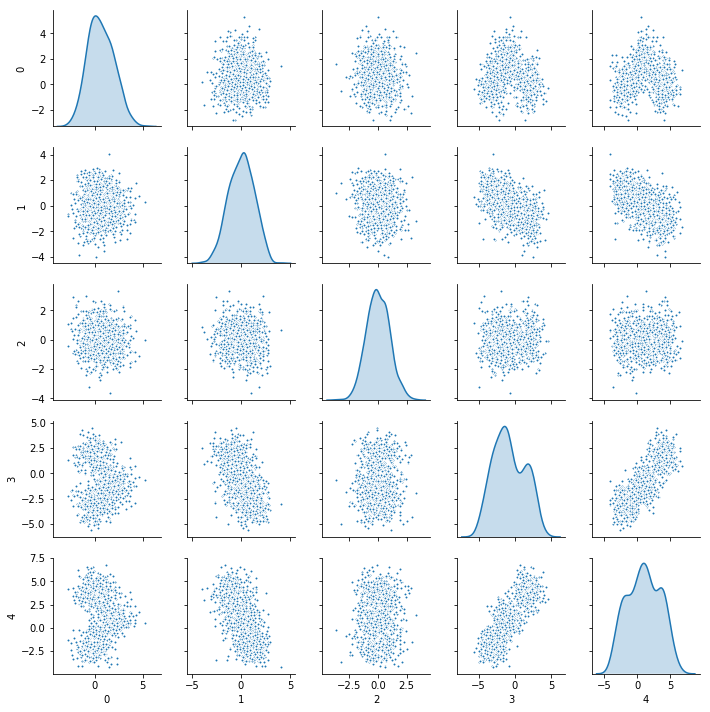

In [33]:
state = np.random.choice(3, 1000, p=[0.4, 0.3, 0.3])
center = np.asarray([[2, 0, 0, -1, 1], [0, -1, 0, 2, 4], [0, 1, 0, -3, -2]])
data = np.random.randn(center.shape[1], state.size) + center[state].T

sns.pairplot(pd.DataFrame(data.T), diag_kind='kde', markers='.', size=2, diag_kws=dict(shade=True))

In terms of variance, we can find the best $m$-dimensional representation of $n$-dimensional ($n>m$) data by solving the minimisation problem

$$\underset{\mathbf{M}}{\min} \left\| \mathbf{X} - \mathbf{M}\mathbf{X} \right|_\text{F}^2$$

for matrices $\mathbf{M}$ with rank $m$; the matrix $\mathbf{X}$ needs to be mean-free in each feature.

To compute a PCA, we start with the covariance matrix of the data

$$\mathbf{C} = \frac{\mathbf{X}\mathbf{X}^\top}{N_\text{sample}}$$

and use an eigenvalue decomposition

$$\mathbf{C} = \mathbf{Q} \mathbf{\Lambda} \mathbf{Q}^T$$

where $\mathbf{\Lambda}$ is the diaginal matrix of eigenvalues and the columns of $\mathbf{Q}$ are the corresponding eigenvectors. By using only the $m$ largest eigenvalues ($\mathbf{\Lambda}_m\in\mathbb{R}^{m \times m}$) and their corresponding eigenvectors ($\mathbf{Q}_m\in\mathbb{R}^{N \times m}$), we can construct the rank-$m$ matrix

$$\mathbf{M} = \mathbf{Q}_m \mathbf{Q}_m^T.$$

and, thus, the desired projection onto the $m$-dimensional feature space is given by $\mathbf{Q}_m$.

[[-0.00639282  0.9649748 ]
 [-0.25014832  0.001114  ]
 [ 0.01879971 -0.09102184]
 [ 0.62573595 -0.18216849]
 [ 0.73857027  0.16538458]]


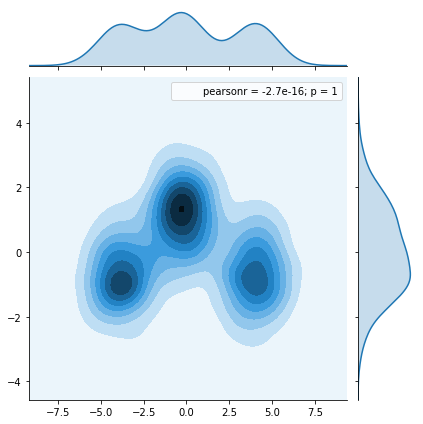

In [34]:
def pca(data, dim):
    data_mf = data - np.mean(data, axis=1)[:, None]
    val, vec = np.linalg.eigh(data_mf @ data_mf.T / len(data))
    srt = np.argsort(val)[::-1]
    prj = vec[:, srt[:min(dim, len(srt))]]
    return prj.T @ data_mf, prj

data_prj, prj = pca(data, 2)
sns.jointplot(*data_prj, kind='kde')
print(prj)

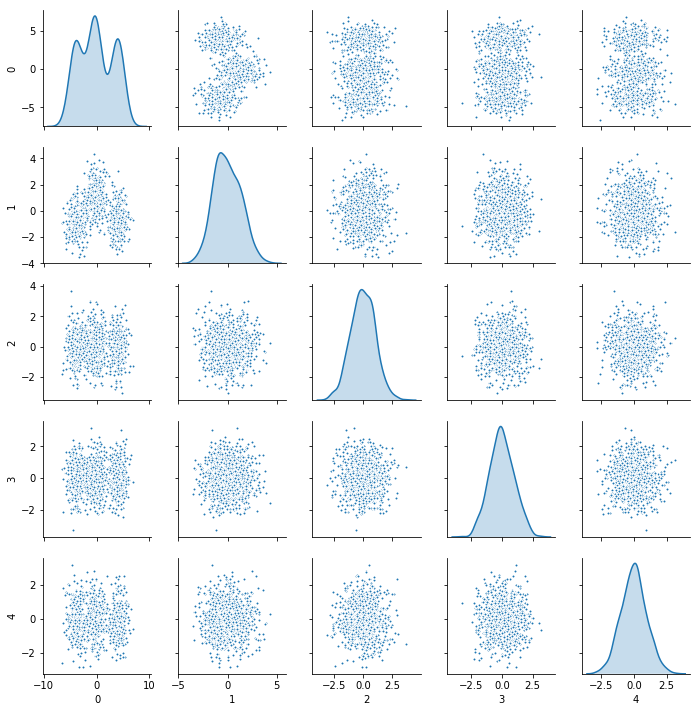

In [35]:
sns.pairplot(pd.DataFrame(pca(data, 5)[0].T), diag_kind='kde', markers='.', size=2, diag_kws=dict(shade=True))

**Exercise**: refactor `pca(data, dim)` for `torch.Tensor`s.

## The `autograd` module
To make `pytorch` track which operations are performed on a `torch.Tensor`, we have to make it into a **variable**:

In [42]:
a = torch.rand(3)
b = torch.autograd.Variable(a)
print(a)
print(b)


 0.5150
 0.9279
 0.2372
[torch.FloatTensor of size 3]

Variable containing:
 0.5150
 0.9279
 0.2372
[torch.FloatTensor of size 3]



If we now modify `b`, we get a new `torch.autograd.Variable`:

In [43]:
c = b**2
print(c)

Variable containing:
 0.2652
 0.8610
 0.0563
[torch.FloatTensor of size 3]



A variable contains memory for a `torch.Tensor` (`data`), but it can also contain gradient information and a pointer the the `torch.autograd.Variable` it was created from. This allows us to **automatically differentiate** functions.

**Example**: locating a local minimum. We define the Rosenbrock function...

In [46]:
def rbf(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

... and visualise it:

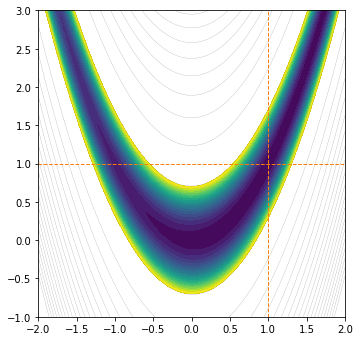

In [50]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-1, 3, 100))
zz = rbf(xx, yy)

fig, cmp = plt.subplots(figsize=(5, 5))
cmp.contour(xx, yy, zz, np.linspace(51, 2000, 20), colors='k', linewidths=0.1)
cmp.contourf(xx, yy, zz, np.linspace(0, 50, 20))
cmp.plot([-2, 2], [1, 1], '--', linewidth=1, color='C1')
cmp.plot([1, 1], [-1, 3], '--', linewidth=1, color='C1')
cmp.set_aspect('equal')
fig.tight_layout()

Now we perform a steepest descent 

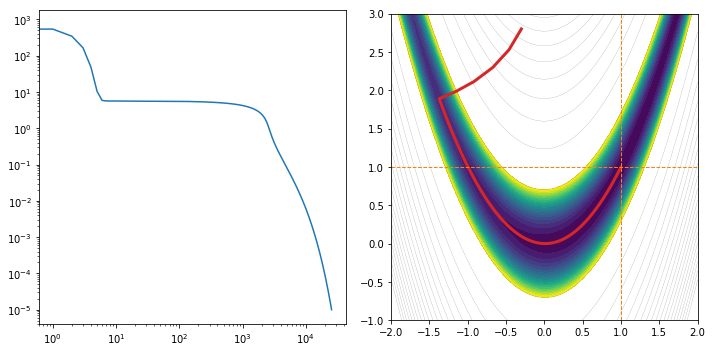

In [37]:
x = torch.autograd.Variable(torch.Tensor([-0.3, 2.8]), requires_grad=True)

path, conv = [], []
while True:
    f = rbf(x[0], x[1])
    path.append(x.data.numpy().copy())
    conv.append(f.data[0])
    if f.data[0] < 0.00001:
        break
    f.backward()
    x.data.sub_(x.grad.data.mul_(0.0005))
    x.grad.zero_()
path = np.asarray(path)



fig, (cnv, cmp) = plt.subplots(1, 2, figsize=(10, 5))
cnv.plot(conv)
cnv.semilogx()
cnv.semilogy()
cmp.contour(xx, yy, zz, np.linspace(51, 2000, 20), colors='k', linewidths=0.1)
cmp.contourf(xx, yy, zz, np.linspace(0, 50, 20))
cmp.plot(*path.T, linewidth=3, color='C3')
cmp.plot([-2, 2], [1, 1], '--', linewidth=1, color='C1')
cmp.plot([1, 1], [-1, 3], '--', linewidth=1, color='C1')
cmp.set_aspect('equal')
fig.tight_layout()

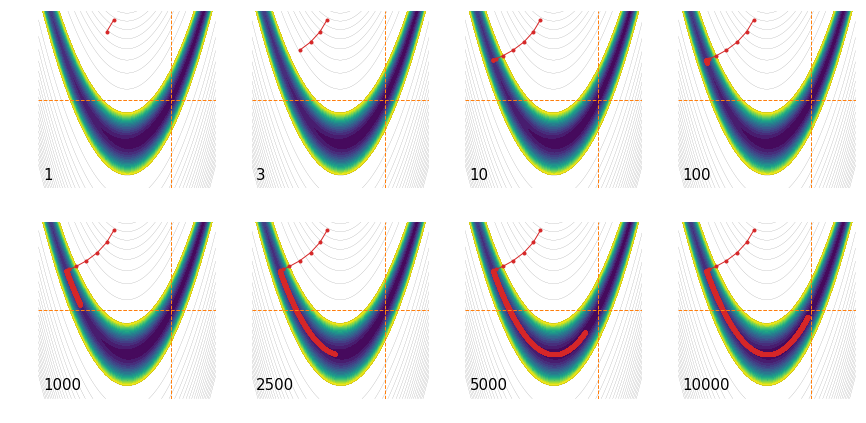

In [38]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for ax, cut in zip(axes.flat, [2, 4, 11, 101, 1001, 2501, 5001, 10001]):
    ax.contour(xx, yy, zz, np.linspace(51, 2000, 20), colors='k', linewidths=0.1)
    ax.contourf(xx, yy, zz, np.linspace(0, 50, 20))
    ax.plot(*path[:cut].T, '-o', markersize=3, linewidth=1, color='C3')
    ax.plot([-2, 2], [1, 1], '--', linewidth=1, color='C1')
    ax.plot([1, 1], [-1, 3], '--', linewidth=1, color='C1')
    ax.set_aspect('equal')
    ax.text(-1.9, -0.8, str(cut - 1), fontsize=15)
    ax.set_axis_off()
fig.tight_layout()